**BART ridership Seasonality**

- Pull total ridership by week for 2016 and 2017
- Linear Graph depicting YOY:
    - Highlight most significant peaks and valleys and find significant events/holidays associated with them
- DF showing month over month / week over week builds
- Hypothesis: Highest peak for 2016 and 2017 would have been Superbowl week (Superbowl in SF February 7th). This would be considered an outlier.

**Observed trends on seasonality:**
- Big spike during superbowl week confirmed
- Drop in ridership during Christimas week
- Drop during summer months

In [81]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [82]:
#Read csv files - year 2015
csv_2015 = pd.read_csv("date-hour-soo-dest-2015.csv", names=['Date', 'time', 'Origin', 'Destination', 'Throughput',])
csv_2015.head()

,Date,time,Origin,Destination,Throughput
0,2015-01-01,0,12TH,12TH,1
1,2015-01-01,0,12TH,16TH,1
2,2015-01-01,0,12TH,24TH,3
3,2015-01-01,0,12TH,ASHB,6
4,2015-01-01,0,12TH,BALB,3


In [83]:
#Read csv files - year 2016
csv_2016 = pd.read_csv("date-hour-soo-dest-2016.csv")
csv_2016.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [84]:
#Read csv files - year 2017
csv_2017 = pd.read_csv("date-hour-soo-dest-2017.csv")
csv_2017.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


In [85]:
#Read number of rows for 2017 file
pd.DatetimeIndex(csv_2017['DateTime']).year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='DateTime', length=3313625)

In [86]:
#Create df for 2016 weekly throughput
Weekly_Thru_2016 = pd.DataFrame(csv_2016.groupby(pd.DatetimeIndex(csv_2016['DateTime']).week)['Throughput'].sum())
Weekly_Thru_2016.reset_index(inplace=True)
Weekly_Thru_2016.columns=["Week", "Throughput"]
Weekly_Thru_2016['Year'] = "2016"
Weekly_Thru_2016

,Week,Throughput,Year
0,1,2302815,2016
1,2,2394815,2016
2,3,2263860,2016
3,4,2701209,2016
4,5,2972383,2016
5,6,2573595,2016
6,7,2331351,2016
7,8,2538338,2016
8,9,2506626,2016
9,10,2470291,2016


In [103]:
Weekly_Thru_2017 = pd.DataFrame(csv_2017.groupby(pd.DatetimeIndex(csv_2017['DateTime']).week)['Throughput'].sum())
Weekly_Thru_2017.reset_index(inplace=True)
Weekly_Thru_2017.columns=["Week", "Throughput"]
Weekly_Thru_2017['Year'] = "2017"
Weekly_Thru_2017.head()

,Week,Throughput,Year
0,1,1876744,2017
1,2,2304289,2017
2,3,2297124,2017
3,4,2450934,2017
4,5,2425669,2017


In [87]:
#Create df for 2015 weekly throughput
Weekly_Thru_2015 = pd.DataFrame(csv_2015.groupby(pd.DatetimeIndex(csv_2015['Date']).week)['Throughput'].sum())
Weekly_Thru_2015.reset_index(inplace=True)
Weekly_Thru_2015.columns=["Week", "Throughput"]
Weekly_Thru_2015['Year'] = "2015"
Weekly_Thru_2015.head()

,Week,Throughput,Year
0,1,696297,2015
1,2,2341257,2015
2,3,2329949,2015
3,4,2275857,2015
4,5,2450734,2015


In [88]:
#Note how many months are available in the 2017 file
Monthly_Thru_2017 = pd.DataFrame(csv_2017.groupby(pd.DatetimeIndex(csv_2017['DateTime']).month)['Throughput'].sum())
Monthly_Thru_2017.reset_index(inplace=True)
Monthly_Thru_2017.columns=["Month", "Throughput"]
Monthly_Thru_2017

,Month,Throughput
0,1,9900438
1,2,9506289
2,3,10944026
3,4,9903187
4,5,1287055


In [89]:
Monthly_Thru_2016 = pd.DataFrame(csv_2016.groupby(pd.DatetimeIndex(csv_2016['DateTime']).month)['Throughput'].sum())
Monthly_Thru_2016.reset_index(inplace=True)
Monthly_Thru_2016.columns=["Month", "Throughput"]
Monthly_Thru_2016

,Month,Throughput
0,1,10078387
1,2,10842145
2,3,11184982
3,4,10692900
4,5,10827558
5,6,11137928
6,7,10375579
7,8,11210330
8,9,10754119
9,10,10952882


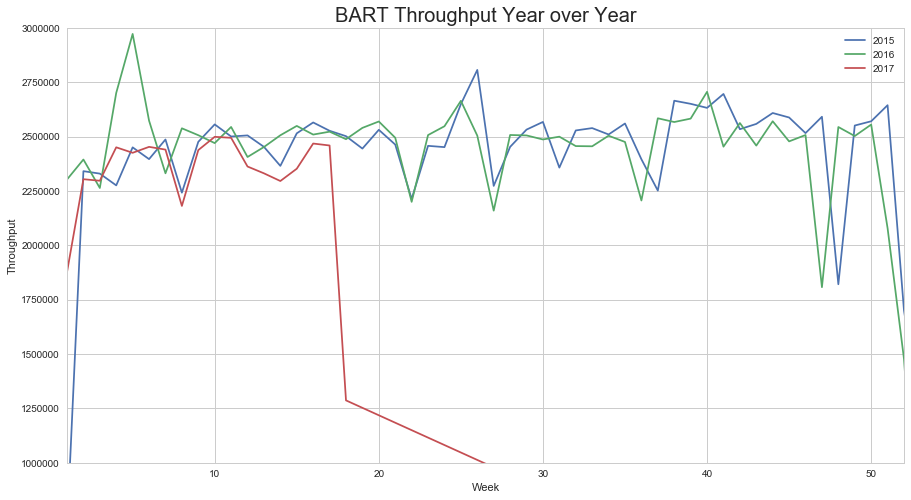

In [104]:
#Plot line char for weekly throughout, years 2015 and 2016
plt.figure(figsize=(15,8))
plt.plot(Weekly_Thru_2015["Week"], Weekly_Thru_2015["Throughput"], label="2015")
plt.plot(Weekly_Thru_2016["Week"], Weekly_Thru_2016["Throughput"], label="2016")
plt.plot(Weekly_Thru_2017["Week"], Weekly_Thru_2017["Throughput"], label="2017")

plt.ylabel("Throughput")
plt.xlabel("Week")
plt.ylim(1000000, 3000000)
plt.xlim(1,52)
plt.title("BART Throughput Year over Year", size=20)
plt.xticks()
plt.legend()
plt.show()

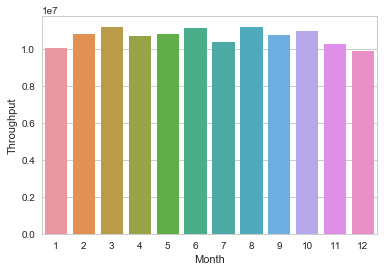

In [91]:
#Throughput by month
sns.set(style="whitegrid")

sns.barplot(x='Month', y='Throughput', data=Monthly_Thru_2016)

In [92]:
#hourlies

Hourly_Thru_2016 = pd.DataFrame(csv_2016.groupby(pd.DatetimeIndex(csv_2016['DateTime']).hour)['Throughput'].sum())
Hourly_Thru_2016.reset_index(inplace=True)
Hourly_Thru_2016.columns=["Hour", "Throughput"]
Hourly_Thru_2016

,Hour,Throughput
0,0,1218224
1,1,212302
2,2,11162
3,3,5527
4,4,177250
5,5,1382397
6,6,3843170
7,7,8994899
8,8,13346607
9,9,10236230


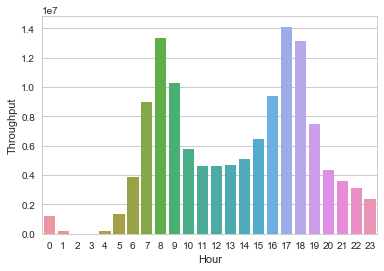

In [94]:
#Throughput by month

sns.set(style="whitegrid")
sns.barplot(x='Hour', y='Throughput', data=Hourly_Thru_2016)
plt.show()